<a href="https://colab.research.google.com/github/yootina/Deep/blob/master/231215_as_10_LightGBM_live.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kaggle 데이터 다운로드 받기

**데이터셋 다운로드**
1. csv를 그냥 다운로드 받는다 (Jupyter)
    * Colab이면? 다시 업로드 (100mb? 20분씩...)
2. github에 올린다 -> (파일하나당) 150MB? -> 안 올라감
3. google drive -> 느려... -> 기본 n시간
4. wget : 링크를 입력하면 해당 링크의 파일을 다운로드
```
# !wget {파일 링크 주소}
# 예시
!wget https://...
```
5. kaggle api로 직접 다운로드
- kaggle.json -> 인증파일 (인증코드)
```
# colab에서 인증파일 적용하는 법
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
```
```
# Kaggle API를 사용해서 파일을 다운로드
# Kaggle > DataSet > Copy API command
!kaggle datasets download -d kartik2112/fraud-detection
```

## 인증 및 데이터 받기

In [ ]:
# https://www.kaggle.com/datasets/kartik2112/fraud-detection

# 1. 본인 kaggle 계정 인증 받음
# kaggle > Profile 이미지 > Account > Account > API > Create New API Token
from google.colab import files
files.upload()

rm: cannot remove '/root/.kaggle': No such file or directory
mv: cannot stat './kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.8/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.8/dist-packages/kaggle/api/kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
# 2. 강사의 kaggle.json (주기적 리셋)
!wget https://raw.githubusercontent.com/BigDeepData/2312_dl/main/etc/kaggle.json

--2023-12-15 01:38:26--  https://raw.githubusercontent.com/BigDeepData/2312_dl/main/etc/kaggle.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 65 [text/plain]
Saving to: ‘kaggle.json’

kaggle.json         100%[===================>]      65  --.-KB/s    in 0s      

2023-12-15 01:38:27 (2.84 MB/s) - ‘kaggle.json’ saved [65/65]



In [ ]:
# 인증 및 파일 다운로드 받기
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d kartik2112/fraud-detection

rm: cannot remove '/root/.kaggle': No such file or directory
 96% 193M/202M [00:01<00:00, 127MB/s]
100% 202M/202M [00:02<00:00, 104MB/s]


In [ ]:
!kaggle datasets list

## 압축 풀기 & 합치기

In [ ]:
# zip -> unzip
# 파일 우측 클릭 > 경로 복사
# 파일 > fraudTest.csv, fraudTrain.csv 생성 확인
!unzip /content/fraud-detection.zip

Archive:  /content/fraud-detection.zip
  inflating: fraudTest.csv           
  inflating: fraudTrain.csv          


In [ ]:
# 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# ls: 현재 경로에 있는 다른 파일/폴더를 불러오는 리눅스 명령
!ls

fraud-detection.zip  fraudTest.csv  fraudTrain.csv  sample_data


In [ ]:
# train = pd.read_csv('fraudTrain.csv')
train = pd.read_csv('fraudTrain.csv', index_col=0) # 첫번째 열을 인덱스 컬럼으로 지정

In [ ]:
train.info() # 1296675 / 1.3M

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop          

In [ ]:
train.head()

In [ ]:
test = pd.read_csv('fraudTest.csv', index_col=0)

In [ ]:
test.head()

In [ ]:
test.info() # 555719 / 0.55M

<class 'pandas.core.frame.DataFrame'>
Int64Index: 555719 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  555719 non-null  object 
 1   cc_num                 555719 non-null  int64  
 2   merchant               555719 non-null  object 
 3   category               555719 non-null  object 
 4   amt                    555719 non-null  float64
 5   first                  555719 non-null  object 
 6   last                   555719 non-null  object 
 7   gender                 555719 non-null  object 
 8   street                 555719 non-null  object 
 9   city                   555719 non-null  object 
 10  state                  555719 non-null  object 
 11  zip                    555719 non-null  int64  
 12  lat                    555719 non-null  float64
 13  long                   555719 non-null  float64
 14  city_pop               555719 non-nu

In [ ]:
# 열이 일치하는 두 데이터를 위아래로 합쳐준다 -> pd.concat([합쳐줄 df들])
# df = pd.concat([train, test]) # 인덱스 겹침 문제 (concatenate)
df = pd.concat([train, test], ignore_index=True)
# 가로로 합치고 싶으면 axis=1 -> 열들이 합쳐짐.
df

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
1852390,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
1852391,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
1852392,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


# 데이터 분석
* https://www.kaggle.com/datasets/kartik2112/fraud-detection/code?datasetId=817870&sortBy=voteCount

In [ ]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

**Credit Card Transactions Fraud Detection Dataset**
* 이상거래 (fraud) : 갑자기 해킹이나 전산 오류 등으로 인해 잘못된 금액이 결제
* 전산 측에서 갑작스러운 오류/전산상의 실수 데이터등을 잡아내서 '이상거래'를 분류
* 카드 결제 데이터 셋 -> ( ... ) => is_fraud (예측값, 종속변수)

* trans_date_trans_time : 거래 시간 (날짜로 표시된 시간)
* cc_num : 카드 번호. 고윳값이기 때문에 여기서는 id처럼 활용할 수 있음(Credit Card) -> 동명 이인더라도 카드번호는 다르겠죠?
* merchant : 거래 상점
* category : 거래 상점의 범주(애완용품, 여행, 엔터테인먼트 등)
* amt: 거래금액 (amount)
* first / last : 이름
* gender : 성별
* city / street / state / zip : 고객 거주지 정보
* lat / long : 고객주소에 대한 위도 및 경도
    * 위경도 -> 지구/지도를 기준으로 했을 때 좌표값
* city_pop : 고객의 zipcode (우편번호) 속하는 인구 수
* job : 직업
* dob : 생년월일
* trans_num : 거래번호
* unix_time : 거래시간 (유닉스 타임스탬프 - 전산상으로 변환된 시간)
* merch_lat / merch_long : 상점의 위경도
---
* is_fraud : 사기거래 여부 (이상거래 여부) -> 종속변수

In [ ]:
# df.info() # not-null count가 안나오고 있음 (데이터가 많아서)
# 데이터가 많아도 not-null count를 보여줌
# 다행히 null (결측치) 없는 데이터

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1852394 non-null  object 
 1   cc_num                 1852394 non-null  int64  
 2   merchant               1852394 non-null  object 
 3   category               1852394 non-null  object 
 4   amt                    1852394 non-null  float64
 5   first                  1852394 non-null  object 
 6   last                   1852394 non-null  object 
 7   gender                 1852394 non-null  object 
 8   street                 1852394 non-null  object 
 9   city                   1852394 non-null  object 
 10  state                  1852394 non-null  object 
 11  zip                    1852394 non-null  int64  
 12  lat                    1852394 non-null  float64
 13  long                   1852394 non-null  float64
 14  city_pop          

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
df.describe() # int, float 수치형 데이터 관련 통계 데이터 표시
# amt: 거래금액 (amount)
# city_pop : 고객의 zipcode 속하는 인구 수
# -> 선형 모델 어려움, 거리 기반 어렵겠다...

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1852394.00,1852394.00,1852394.00,1852394.00,1852394.00,1852394.00,1852394.00,1852394.00,1852394.00,1852394.00
mean,417386038393710400.00,70.06,48813.26,38.54,-90.23,88643.67,1358674218.83,38.54,-90.23,0.01
std,1309115265318734848.00,159.25,26881.85,5.07,13.75,301487.62,18195081.39,5.11,13.76,0.07
min,60416207185.00,1.00,1257.00,20.03,-165.67,23.00,1325376018.00,19.03,-166.67,0.00
25%,180042946491150.00,9.64,26237.00,34.67,-96.80,741.00,1343016823.75,34.74,-96.90,0.00
50%,3521417320836166.00,47.45,48174.00,39.35,-87.48,2443.00,1357089331.00,39.37,-87.44,0.00
75%,4642255475285942.00,83.10,72042.00,41.94,-80.16,20328.00,1374581485.25,41.96,-80.25,0.00
max,4992346398065154048.00,28948.90,99921.00,66.69,-67.95,2906700.00,1388534374.00,67.51,-66.95,1.00


In [ ]:
df.describe(include='O')

,trans_date_trans_time,merchant,category,first,last,gender,street,city,state,job,dob,trans_num
count,1852394,1852394,1852394,1852394,1852394,1852394,1852394,1852394,1852394,1852394,1852394,1852394
unique,1819551,693,14,355,486,2,999,906,51,497,984,1852394
top,2019-04-22 16:02:01,fraud_Kilback LLC,gas_transport,Christopher,Smith,F,444 Robert Mews,Birmingham,TX,Film/video editor,1977-03-23,0b242abb623afc578575680df30655b9
freq,4,6262,188029,38112,40940,1014749,4392,8040,135269,13898,8044,1


* trans_date_trans_time : 거래 시간
* merchant : 거래 상점
* category : 거래 상점의 범주(애완용품, 여행, 엔터테인먼트 등)
* first / last : 이름
* gender : 성별 (F/M)
* city / street / state / zip : 고객 거주지 정보
* job : 직업
* dob : 생년월일
* trans_num : 거래번호

# 전처리

In [ ]:
# 사용되지 않는 변수 제거
# df.drop(..., axis=1) -> 원본 안 바꿔주는 것
# 1. df = df.drop(..., axis=1)
# inplace=True -> 모든 df에 있는 메소드에서 존재하지 X
# 깊은 복사, 얕은 복사 문제 때문에 가능하면 새로운 사본을 만들어서 처리 (immutable)
# 2. df.drop(..., axis=1, inplace=True)
# pd -> 판다스 자체에서 불러오는 것이기 때문에 inplace X
# 이름 -> 이름 조합을 만들어서 full name / cc_num 고객은 특정 가능
# 주소 -> 위도경도(lat, long)
# 거래번호 / 유닉스타임 (중복) -> trans_date_trans_time
# 직업, 가게명

df.drop(['first', 'last', # 이름 -> 이름 조합을 만들어서 full name / cc_num 고객은 특정 가능
         'street', 'city', 'state', 'zip', # 주소 -> 위도경도(lat, long)
         'trans_num', 'unix_time', # 거래번호 / 유닉스타임 (중복) -> trans_date_trans_time
         'job', 'merchant' # 직업, 가게명
         ], axis=1, inplace=True)

Index(['trans_date_trans_time', 'cc_num', 'category', 'amt', 'gender', 'lat',
       'long', 'city_pop', 'dob', 'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

## trans_date_trans_time

In [ ]:
# trans_date_trans_time  object => datetime 타입으로 바꿔줘야함
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 12 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   cc_num                 int64  
 2   category               object 
 3   amt                    float64
 4   gender                 object 
 5   lat                    float64
 6   long                   float64
 7   city_pop               int64  
 8   dob                    object 
 9   merch_lat              float64
 10  merch_long             float64
 11  is_fraud               int64  
dtypes: float64(5), int64(3), object(4)
memory usage: 169.6+ MB


In [ ]:
# pd.to_datetime -> 문자열 형태의 날짜데이터를, dt으로 포맷을 바꿔줌
# https://dataindependent.com/pandas/pandas-to-datetime-string-to-date-pd-to_datetime/
df.trans_date_trans_time = pd.to_datetime(df.trans_date_trans_time)
df.info() # trans_date_trans_time  datetime64[ns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 12 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   cc_num                 int64         
 2   category               object        
 3   amt                    float64       
 4   gender                 object        
 5   lat                    float64       
 6   long                   float64       
 7   city_pop               int64         
 8   dob                    object        
 9   merch_lat              float64       
 10  merch_long             float64       
 11  is_fraud               int64         
dtypes: datetime64[ns](1), float64(5), int64(3), object(3)
memory usage: 169.6+ MB


## 피쳐 엔지니어링
* 이상거래 : 원래 고객의 거래패턴에서 벗어나는 거래

### 결제 금액
* 평균에서 벗어난다 -> 정규분포(z 점수)에서 얼마나 멀리 벗어나 있는지
* 서로 다른 개인 -> 특정 -> cc_num : 카드번호별로 묶어서 -> 결제 금액 평균
* 혹시나 너무 갑자기 큰 금액을 썼다면? => 이상거래

In [ ]:
# (groupby로 묶어준 그룹/속성).agg : 특정한 그룹별로 통계값, 대표값 추출
# mean -> 통계값 / std -> 표준편차 : Z점수 (x - 평균) / 표준편차 => 평균으로부터 얼마나 떨어져 있는지 표준화한 값
amt_info = df.groupby('cc_num').amt.agg(['mean', 'std'])
# index(행 인덱스 이름)로 각 cc_num -> reset index?
amt_info.head()
# 카드번호별로 평균 소비액(mean), 표준편차(std)

,mean,std
cc_num,,
60416207185,59.257796,142.869746
60422928733,65.483159,92.042844
60423098130,96.376084,1000.693872
60427851591,107.487550,131.014534
60487002085,64.096925,153.207660


In [ ]:
# 두 개의 데이터프레임을 열 방향으로 합쳐줄 때 -> merge
# A.merge(B) -> A가 왼쪽, B가 오른쪽해서 두 df을 합쳐줌
# 같은 CC_NUM을 가진 거래 기록과, CC_NUM별 소비기록 평균 및 표준편차를 매칭
# 거래 기록 수 > CC_NUM보다 많음 => 같은 CC_NUM을 가졌을 경우 같은 평균, 표준편차를 공유
df = df.merge(amt_info, left_on='cc_num', right_index=True, how='left') # how='left' : A, B 중에 A가 있는 쪽을 선택해서 합쳐주겠다

Index(['trans_date_trans_time', 'cc_num', 'category', 'amt', 'gender', 'lat',
       'long', 'city_pop', 'dob', 'merch_lat', 'merch_long', 'is_fraud',
       'mean', 'std'],
      dtype='object')

In [ ]:
# amt (각 거래 기록별 소비금액)
# mean (cc_num별 평균 소비금액)
# std (cc_num별 소비금액의 표준편차)
# https://losskatsu.github.io/statistics/mean-vairance/
# z점수 : 특정한 값이 평균 기준으로 얼마나 멀리 떨어져있는지
df[['cc_num', 'amt', 'mean', 'std']].head()

,cc_num,amt,mean,std
0,2703186189652095,4.97,89.408743,127.530101
1,630423337322,107.23,56.078113,159.201852
2,38859492057661,220.11,69.924272,116.688602
3,3534093764340240,45.00,80.090040,280.077880
4,375534208663984,41.96,95.341146,94.322842


In [ ]:
# z-score = (amt / mean) / std
# 벡터화 연산 (행들을 열들간 연산)
df['amt_z_score'] = (df['amt'] - df['mean']) / df['std']

In [ ]:
df['amt_z_score'].head() # 특정 amt값이 평균 대비 얼마나 떨어져 있는지 (부호 : 어느 방향)

0   -0.662108
1    0.321302
2    1.287064
3   -0.125287
4   -0.565941
Name: amt_z_score, dtype: float64

In [ ]:
# z-score 산출을 위해 쓰인 다른 열들 drop
df.drop(['mean', 'std'], axis=1, inplace=True)

### 범주별 결제금액
* cc_num -> 카드번호별 / category -> (상점의) 분류.카테고리.범주

In [ ]:
# 2개 이상의 열로 그룹으로 나눌 때는 df.groupby([열 이름들...])
category_info = df.groupby(['cc_num', 'category']).amt.agg(['mean', 'std']).reset_index()
category_info # cc_num, category별로 -> 평균값 (결제액), 표준편차

,cc_num,category,mean,std
0,60416207185,entertainment,51.838855,65.485714
1,60416207185,food_dining,26.737097,46.382603
2,60416207185,gas_transport,59.779429,15.758267
3,60416207185,grocery_net,52.152973,17.694871
4,60416207185,grocery_pos,101.557761,21.894156
...,...,...,...,...
13166,4992346398065154184,misc_pos,60.003043,167.226191
13167,4992346398065154184,personal_care,48.777227,49.523818
13168,4992346398065154184,shopping_net,86.280136,217.047242
13169,4992346398065154184,shopping_pos,64.213333,169.239073


In [ ]:
# df와 category_info를 합쳐주겠다 -> cc_num과 category를 기준으로
# mean, std
df = df.merge(category_info, on=['cc_num','category'], how='left')
# reset index 안했다?
# df = df.merge(category_info, left_on=['cc_num','category'], right_index=True, how='left')

In [ ]:
# cc_num, category / mean, std / amt => z-score
df[['cc_num', 'category', 'amt', 'mean', 'std']].head()

,cc_num,category,amt,mean,std
0,2703186189652095,misc_net,4.97,84.860809,116.070300
1,630423337322,grocery_pos,107.23,99.637224,23.904424
2,38859492057661,entertainment,220.11,46.653103,60.385161
3,3534093764340240,gas_transport,45.00,61.537283,15.746841
4,375534208663984,misc_pos,41.96,35.481357,4.934731


In [ ]:
# 범주별 결제금액 z-score
df['cat_z_score'] = (df['amt'] - df['mean']) / df['std']

In [ ]:
df['cat_z_score'].head() # 1.69 (95%), 2.58 (99%)

0   -0.688297
1    0.317631
2    2.872509
3   -1.050197
4    1.312866
Name: cat_z_score, dtype: float64

In [ ]:
# z-score 산출을 위해 쓰인 다른 열들 drop
df.drop(['mean', 'std'], axis=1, inplace=True)

### 위.경도 -> 거리 산출

In [ ]:
# 두 지점 간의 거리 (위경도)
# latitude(위도, lat), longitude(경도, long, lng)
# geopy.distance.distance((lat1, lng1), (lat2, lng2)) -> 거리

In [ ]:
# coordinate(좌표) - 위,경도.
# -- 좌표 : (위도, 경도) - latitude : 북/남 | logitude : 동/서
# 1. 상점 위경도 (merchant)
# 2. 고객 위경도 (customer)
# zip -> 2개 이상의 리스트를 원소 순서대로 묶어주겠음
df['merch_coord'] = pd.Series(zip(df.merch_lat, df.merch_long))
df['cust_coord'] = pd.Series(zip(df['lat'], df['long']))

In [ ]:
import geopy.distance # 거리 구하는 파이썬 라이브러리
#  df.apply(lambda x: geopy.distance.distance(x['merch_coord'], x['cust_coord']).km, axis=1)
def get_distance(row):
    coord1 = row['merch_coord'] # [merch_lat, merch_long] / 상점 위경도
    coord2 = row['cust_coord'] # [lat, long] / 고객 위경도
    return geopy.distance.distance(coord1, coord2).km

In [ ]:
df['distance'] = df.apply(get_distance, axis=1)

In [ ]:
# km

0    78.77
1    30.22
2   108.10
3    95.69
4    77.70
Name: distance, dtype: float64

In [ ]:
# .km 빼먹고 했다?
# 78.77 km => 78.77 / km => 78.77 (string) => float
# df['distance'] = df['distance'].str.split(expand=True)[0].astype('float64')

In [ ]:
# 거주 위치 - 결제 위치가 너무 차이난다?
# z-점수
distance_info = df.groupby('cc_num').agg(['mean','std']).distance

<ipython-input-30-a45f4333694f>:3: FutureWarning: ['trans_date_trans_time', 'category', 'gender', 'dob', 'merch_coord', 'cust_coord'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  distance_info = df.groupby('cc_num').agg(['mean','std']).distance


In [ ]:
distance_info

,mean,std
cc_num,,
60416207185,73.53,28.70
60422928733,78.99,29.30
60423098130,77.83,28.19
60427851591,75.71,28.98
60487002085,79.44,28.77
...,...,...
4958589671582726883,76.74,29.12
4973530368125489546,78.75,29.45
4980323467523543940,72.27,28.28


In [ ]:
# 1.
# distance_info = distance_info.reset_index() # -> cc_num
# df = df.merge(distance_info, on='cc_num', how='left')
# 2.
df = df.merge(distance_info, left_on='cc_num', right_index=True, how='left')

In [ ]:
# z_score : 평균을 0으로 뒀을 때 얼마나 떨어있는지를 표준화 (z점수, 표준정규분포)
df['distance_z_score'] = (df['distance'] - df['mean']) / df['std']

In [ ]:
df['distance_z_score'].head()

0    0.03
1   -1.48
2    1.16
3    0.82
4    0.06
Name: distance_z_score, dtype: float64

In [ ]:
# 사용한 통계치 drop
df.drop(['mean', 'std'], axis=1, inplace=True)

### 생년월일 (dob) -> 연령

In [ ]:
df['dob'] # date of birth

0          1988-03-09
1          1978-06-21
2          1962-01-19
3          1967-01-12
4          1986-03-28
              ...    
1852389    1966-02-13
1852390    1999-12-27
1852391    1981-11-29
1852392    1965-12-15
1852393    1993-05-10
Name: dob, Length: 1852394, dtype: object

0         1988-03-09
1         1978-06-21
2         1962-01-19
3         1967-01-12
4         1986-03-28
             ...    
1852389   1966-02-13
1852390   1999-12-27
1852391   1981-11-29
1852392   1965-12-15
1852393   1993-05-10
Name: dob, Length: 1852394, dtype: datetime64[ns]

In [ ]:
# year
# pd.to_datetime(df['dob']).year # 에러남 (year 없음)
# dt 속성 : 특정 시리즈/df에서 dt의 메소드/속성을 사용할 수 있게함 (참고: str)
pd.to_datetime(df['dob']).dt.year

0          1988
1          1978
2          1962
3          1967
4          1986
           ... 
1852389    1966
1852390    1999
1852391    1981
1852392    1965
1852393    1993
Name: dob, Length: 1852394, dtype: int64

In [ ]:
df['age'] = 2023 - pd.to_datetime(df['dob']).dt.year # 만 나이

In [ ]:
df.age

0          35
1          45
2          61
3          56
4          37
           ..
1852389    57
1852390    24
1852391    42
1852392    58
1852393    30
Name: age, Length: 1852394, dtype: int64

## 범주형 변수 처리

In [ ]:
# 필요없는 열(변수) drop
df.drop([
    'cc_num', 'lat', 'long',
    'merch_lat', 'merch_long', 'dob',
    'merch_coord', 'cust_coord'
], axis=1, inplace=True)

In [ ]:
# 더미 변수 만들기
df.describe(include='O')

,category,gender
count,1852394,1852394
unique,14,2
top,gas_transport,F
freq,188029,1014749


In [ ]:
df = pd.get_dummies(df,
                    columns = df.describe(include='O').columns,
                    drop_first=True)

# 모델링

## 훈련셋/시험셋

In [ ]:
# 과거의 이상거래를 사용해서 -> 미래의 이상거래를 감지
# 시간 단위로 훈련셋/시험셋을 나눠줘야함
# grid search cv, train_test_split
# 날짜 단위로 나눠주기

In [ ]:
df.index

Int64Index([      0,       1,       2,       3,       4,       5,       6,
                  7,       8,       9,
            ...
            1852384, 1852385, 1852386, 1852387, 1852388, 1852389, 1852390,
            1852391, 1852392, 1852393],
           dtype='int64', length=1852394)

In [ ]:
# trans_date_trans_time -> dt 인덱스
df.set_index('trans_date_trans_time', inplace=True)

In [ ]:
df.index # 2020-07-01 이전, 이후 데이터 나눠서 train, test

DatetimeIndex(['2019-01-01 00:00:18', '2019-01-01 00:00:44',
               '2019-01-01 00:00:51', '2019-01-01 00:01:16',
               '2019-01-01 00:03:06', '2019-01-01 00:04:08',
               '2019-01-01 00:04:42', '2019-01-01 00:05:08',
               '2019-01-01 00:05:18', '2019-01-01 00:06:01',
               ...
               '2020-12-31 23:57:18', '2020-12-31 23:57:50',
               '2020-12-31 23:57:56', '2020-12-31 23:58:04',
               '2020-12-31 23:58:34', '2020-12-31 23:59:07',
               '2020-12-31 23:59:09', '2020-12-31 23:59:15',
               '2020-12-31 23:59:24', '2020-12-31 23:59:34'],
              dtype='datetime64[ns]', name='trans_date_trans_time', length=1852394, freq=None)

In [ ]:
train = df[df.index < '2020-07-01'] # 2020년 7월 1일 이전 데이터 (경계 미포함)
test = df[df.index >= '2020-07-01'] # 2020년 7월 1일 이후 데이터 (경계 포함)

In [ ]:
# 예측값(종속변수, y) : is_fraud
# 관측값(독립변수, X) : 나머지
X_train = train.drop('is_fraud', axis=1)
y_train = train['is_fraud']
X_test = test.drop('is_fraud', axis=1)
y_test = test['is_fraud']

## 모델 학습

In [ ]:
import lightgbm as lgb

In [ ]:
# 연속형 변수를 예측하는 '회귀' 문제를 푼다면? lgb.LGBMRegressor
# 범주형 변수를 예측하는 '분류' 문제를 푼다면? lgb.LGBMClassifier
model = lgb.LGBMClassifier(random_state=26)

In [ ]:
model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 7639, number of negative: 1319094
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.069853 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1634
[LightGBM] [Info] Number of data points in the train set: 1326733, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.005758 -> initscore=-5.151434
[LightGBM] [Info] Start training from score -5.151434


LGBMClassifier(random_state=26)

In [ ]:
pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.9949910683881817

In [ ]:
1 - df.is_fraud.mean()

0.9947899852839083

# 평가

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

In [ ]:
# 실제 y값, 예측 y값을 넣어주면 confusion matrix를 그려주는 함수
def confusion_matrix_view(y_test, pred):
    cf_matrix = confusion_matrix(y_test, pred) # 배열
    #  [ [ TN , FP ],
    #    [ FN , TP ] ]
    print(cf_matrix)
    group_names = ['TN','FP','FN','TP'] # 각기 4개의 그룹으로
    # TN : 실제 0, 분류 0
    # TP : 실제 1, 분류 1
    # FP : 위양성, 실제 0, 분류 1 -> 1종 오류
    # FN : 위음성, 실제 1, 분류 0 -> 2종 오류
    group_counts = ["{0:0.0f}".format(value) for value in
                    cf_matrix.flatten()] # 그룹별 갯수 / arr.flatten() -> 한 줄로
    group_percentages = ["{0:.2%}".format(value) for value in
                        cf_matrix.flatten()/np.sum(cf_matrix)] # 그룹별 비중, 비율
                        # flatten -> 2 x 2 -> 4 -> 합계로 나눠준 것
    # v1 : 그룹명 -> 이진분류(TN,FP,FN,TP...) -> 3개이상이면? 0->1, 1->1...
    # v2 : 그룹별 갯수
    # v3 : 그룹별 비중(비율)
    # \n -> Enter (줄바꿈)
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2) # 2 x 2
    # ['TN','FP','FN','TP']
    '''
      [['TN','FP'],
       ['FN','TP']]
    '''
    # seaborn.heatmap(열마다 크기에 따라서 색상/짙음 정도를 결정)
    # cmap -> colormap -> 어떠한 색상표를 쓸 것이냐
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='coolwarm')
    plt.ylabel('True') # 실제값
    plt.xlabel('Predicted') # 예측값
    plt.show()
    # 분류 리포트
    print(classification_report(y_test, pred))

[[522602   1047]
 [   783   1229]]


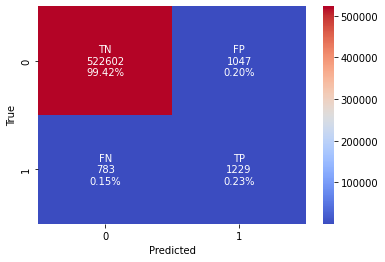

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    523649
           1       0.54      0.61      0.57      2012

    accuracy                           1.00    525661
   macro avg       0.77      0.80      0.79    525661
weighted avg       1.00      1.00      1.00    525661



In [ ]:
confusion_matrix_view(y_test, pred)

In [ ]:
# 정밀도 - precision - 1종 오류 (FP)
# 재현율 - recall - 2종 오류 (FN)
# f1 점수 - 정밀도와 재현율의 조화평균 -> 두 수치의 영향력을 모두 확인
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    523649
           1       0.54      0.61      0.57      2012

    accuracy                           1.00    525661
   macro avg       0.77      0.80      0.79    525661
weighted avg       1.00      1.00      1.00    525661



In [ ]:
# 0, 1 => 분류되기 전에 얼마나 각각의 확률이 산출되는지
model.predict_proba(X_test)

array([[9.99990022e-01, 9.97832954e-06],
       [9.99987137e-01, 1.28629691e-05],
       [1.00000000e+00, 0.00000000e+00],
       ...,
       [9.99946103e-01, 5.38967971e-05],
       [9.99717069e-01, 2.82930873e-04],
       [9.99931572e-01, 6.84277523e-05]])

In [ ]:
# 각 행 -> 입력받은 시험셋의 행 데이터별로, 각각의 분류가 될 확률
# 2차원 행열 -> 각각 열
# 1(0)열 : 0에 대한 예측값 (확률값)
# 2(1)열 : 1에 대한 예측값 (확률값)
proba = model.predict_proba(X_test)
proba

array([[9.99990022e-01, 9.97832954e-06],
       [9.99987137e-01, 1.28629691e-05],
       [1.00000000e+00, 0.00000000e+00],
       ...,
       [9.99946103e-01, 5.38967971e-05],
       [9.99717069e-01, 2.82930873e-04],
       [9.99931572e-01, 6.84277523e-05]])

In [ ]:
# numpy 인덱싱 -> [행, 열] -> [:(모든 행), n]
proba[:, 1] # 예측값이 1이 될 확률 / 이상거래일 확률

array([9.97832954e-06, 1.28629691e-05, 0.00000000e+00, ...,
       5.38967971e-05, 2.82930873e-04, 6.84277523e-05])

In [ ]:
# proba = 이상거래일 확률 예측치
proba = proba[:, 1]

In [ ]:
# default : 0.5보다 크면 -> 1로 분류
# 민감하게 혹은 둔감하게 처리 가능
# case 1 : 0.2만 넘으면 1로 분류 (느슨함)
# case 2 : 0.8을 넘어야 1로 분류 (엄격함)
# 벡터화 연산으로 비교 연산 (> 0.2) => T/F => astype(int) 0/1
proba_int1 = (proba > 0.2).astype('int')
proba_int1

array([0, 0, 0, ..., 0, 0, 0])

0과 1로 구성되어 있는 데이터에 `mean` 평균을 내면 -> 1의 비중을 알 수 있음 -> 예측치로 환산한다면? -> 이상거래로 분류된 비중

In [ ]:
pred.mean() # 기준이 0.5일 때의 예측치

0.004518120994329045

In [ ]:
proba_int1.mean() # 기준이 0.2일 때의 예측치

0.00696075988136841

In [ ]:
proba_int2 = (proba > 0.8).astype('int')
proba_int2

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
proba_int2.mean() # 기준이 0.8일 때의 예측치

0.0030590057090025703

[[522151   1498]
 [  1135    877]]


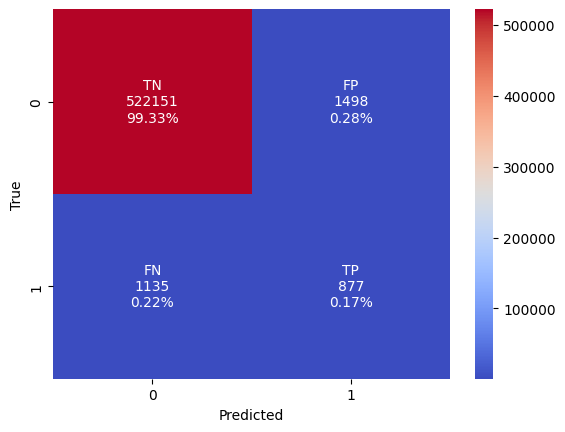

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    523649
           1       0.37      0.44      0.40      2012

    accuracy                           0.99    525661
   macro avg       0.68      0.72      0.70    525661
weighted avg       1.00      0.99      1.00    525661



In [ ]:
# 0.5 를 기준으로 했을 때의 혼동행렬, 분류리포트
confusion_matrix_view(y_test, pred)

[[521090   2559]
 [   912   1100]]


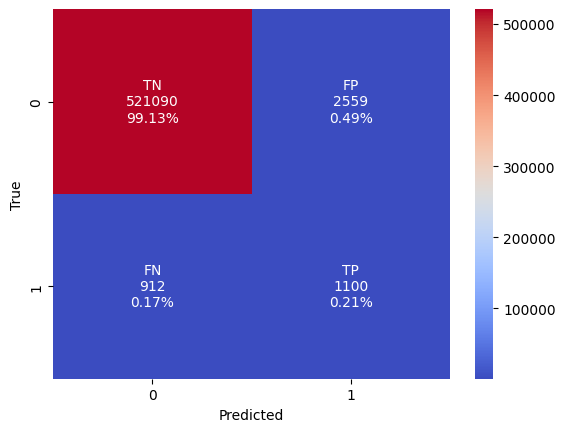

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    523649
           1       0.30      0.55      0.39      2012

    accuracy                           0.99    525661
   macro avg       0.65      0.77      0.69    525661
weighted avg       1.00      0.99      0.99    525661



In [ ]:
# 0.2 를 기준으로 했을 때의 혼동행렬, 분류리포트
confusion_matrix_view(y_test, proba_int1)
# FP가 늘었음 (1종 오류가 늘었음 -> 이상거래가 아닌데 맞다고 판단한 것이 늘었음)
# FN은 줄었음 (2종 오류가 줄엇음 -> 이상거래 맞는데 아니라고 판단한 것이 줄었음)

[[522639   1010]
 [  1414    598]]


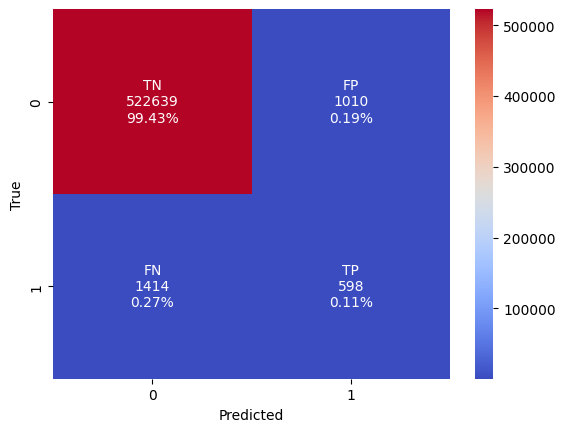

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    523649
           1       0.37      0.30      0.33      2012

    accuracy                           1.00    525661
   macro avg       0.68      0.65      0.66    525661
weighted avg       0.99      1.00      1.00    525661



In [ ]:
# 0.8 를 기준으로 했을 때의 혼동행렬, 분류리포트
confusion_matrix_view(y_test, proba_int2)
# FP가 줄었음 (1종 오류가 줄었음 -> 이상거래가 아닌데 맞다고 판단한 것이 줄었음)
# FN은 늘었음 (2종 오류가 늘었음 -> 이상거래 맞는데 아니라고 판단한 것이 늘었음)

## ROC 곡선 & AUC

![ROC](https://i.imgur.com/euCumVh.png)

* [참고](https://losskatsu.github.io/machine-learning/stat-roc-curve/#2-%EB%AF%BC%EA%B0%90%EB%8F%84%EC%99%80-%ED%8A%B9%EC%9D%B4%EB%8F%84)
* 이진분류 모델을 평가하는 방법으로 기준점에 영향을 받지 않기 때문에 여러 모델을 비교할 때 요긴하게 사용
* AUC는 ROC 곡선의 아래 면적을 의미
    * 0.5~1 사이의 값을 지니며 높을수록 좋은 모델

## ROC 곡선
> 민감도, 특이도 개념을 활용

### 민감도 (TPR)
$TPR = \frac{TP(참 양성)}{TP(참 양성) + FN(거짓 음성)}$
* 재현율과 수식이 같음
* 실제 1인 것 중 얼마만큼 제대로(1로) 예측되었는지
* 1에 가까울 수록 좋은 수치

### 특이도 (TNR) **
$TNR = \frac{TN(참 음성)}{FP(거짓 양성) + TN(참 음성)}$
* 실제 0인 것 중 얼마만큼 제대로(0로) 예측되었는지
* 1에 가까울 수록 좋은 수치

$FPR = \frac{FP(거짓 양성)}{FP(거짓 양성) + TN(참 음성)}$
* 실제 0인 것 중 얼마만큼 잘못(1로) 예측되었는지
* 0에 가까울 수록 좋은 수치
$FPR = 1 - TNR$

민감도(TPR)을 높이기 위해서 기준을 낮추면, 반대로 FPR은 증가하게 되어 있음
(역의 관계)
하지만 예측력이 좋은 모델이라면 그 변화치가 높지 않음

![ROC](https://i.imgur.com/euCumVh.png)
* 기준점을 바꿨을 때 TPR, FPR이 어떻게 바뀌는지 보여주는 그래프
* 최악의 경우 (학습이 전혀 안될 경우) -> 빨간색 점선

### AUC (Area Under the ROC Curve)
* ROC 곡선의 아래쪽에 해당하는 면적
* 0.5~1 사이의 값을 가지며 커질 수록 더 좋은 분류기라는 의미
![AUC](https://i.imgur.com/udlCMW4.png)

In [ ]:
# 0과 1을 얼마나 잘 분류하는지 (성능 좋은지)
# proba -> 1이 될 확률
roc_auc_score(y_test, proba)

0.9614512689355635

# 하이퍼 패러미터 튜닝
* 그리드 서치 : 주입할 패러미터 목록들을 딕셔너리 형태로 넣어서, 각각의 패러미터들을 모두 조합한 모델들을 학습시켜봐서, 최적의 모델을 찾는 것
    * 너무 다 시도해봤자, 결국은 시간낭비일 수 있음
    * 빨리 적당한 패러미터 조합이 필요할 수도 있음
* 랜덤 서치 : 더 넓은 영역의 하이퍼 파라미터 값을 더 짧은 시간에 다양하게 활용
    * 일부만 추출해서 모델링 -> 시간이 더 짧아짐

## 랜덤 서치

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# 랜덤 서치에 사용될 파라미터들 (딕셔너리)
params = {
    "n_esimators": [100, 500, 1000], # 총 생성할 트리 개수
    "learning_rate": [0.01, 0.05, 0.1, 0.3], # 경사하강법에 적용할 학습률 (오차를 어느 범위만큼 수정할까)
    # 너무 작으면 -> 오버피팅, 시간 오래걸림 / 너무 크면 -> 학습이 제대로 안됨
    "lambda_l1": [0, 10, 20, 30, 50],
    "lambda_l2": [0, 10, 20, 30, 50],
    # 경사하강법과 관련 -> 오버피팅 줄이기
    "max_depth": [5, 10, 15, 20], # 트리의 최대깊이 / 과적합
    "subsample": [0.6, 0.8, 1] # 일부의 데이터만 사용해서 트리를 만들게 (1: 전체)
}

**L1 정규화(lambda_l1)와 L2 정규화(lambda_l2)**
* 라쏘 회귀(lasso regression) - L1 정규화
* 릿지 회귀(rigde regression) - L2 정규화
> 둘 다 매개 변수에 패널티를 가해서 그 영향력(계수)을 감소 시키는 방법.<br>
오버피팅을 방지하는 목적으로 쓰임

In [ ]:
model2 = lgb.LGBMClassifier(random_state=26)
# (학습에 쓰일 모델, param_distributions 랜덤 서치에 쓰일 파라미터들, n_iter 몇 번 조합을 추출할지
#  scoring 모델 간 비교 수치, n_jobs cpu 코어 개수 (-1: 전체))
rs = RandomizedSearchCV(model2, param_distributions=params, n_iter=30,
                        scoring='roc_auc', random_state=26, n_jobs=-1)

In [ ]:
import time
start = time.time()
rs.fit(X_train, y_train)
print(time.time() - start)

[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] lambda_l2 is set=50, reg_lambda=0.0 will be ignored. Current value: lambda_l2=50
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] lambda_l2 is set=50, reg_lambda=0.0 will be ignored. Current value: lambda_l2=50
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 7639, number of negative: 1319094
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.038275 seconds.
You can set `force_row_wise=true` to remove the overhe

In [ ]:
rs.best_params_ # 이 조합을 쓰면 됨

{'subsample': 1,
 'n_esimators': 100,
 'max_depth': 20,
 'learning_rate': 0.1,
 'lambda_l2': 50,
 'lambda_l1': 10}

In [ ]:
rs.best_score_ # 5개 정도로 나온 값들이 평균치

0.9940683753009398

In [ ]:
rs_proba = rs.predict_proba(X_test)

[[523307    342]
 [   838   1174]]


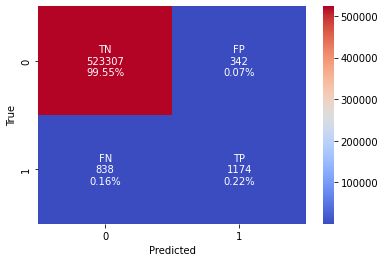

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    523649
           1       0.77      0.58      0.67      2012

    accuracy                           1.00    525661
   macro avg       0.89      0.79      0.83    525661
weighted avg       1.00      1.00      1.00    525661



In [ ]:
# rs_proba[:, 1] : proba -> 0열 : 0이 될 확률, 1열: 1이 될 확률
# [모든행중에, 1번째열] -> 1이 될 확률만 호출
# roc_auc_score(y_test, rs_proba[:, 1])
confusion_matrix_view(y_test, rs.predict(X_test))

[[522346   1303]
 [   472   1540]]


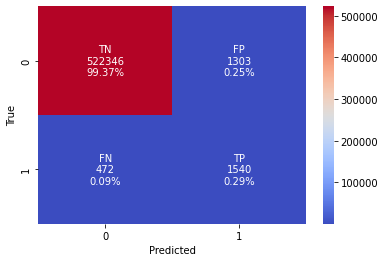

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    523649
           1       0.54      0.77      0.63      2012

    accuracy                           1.00    525661
   macro avg       0.77      0.88      0.82    525661
weighted avg       1.00      1.00      1.00    525661



In [ ]:
# 0.2로 조금 더 느슨하게 (정밀도를 희생하고, 재현율 높임)
rs_proba_int1 = (rs_proba[:,1] > 0.2).astype('int') # 1이 될 확률이 0.2만 넘어가도 1로 취급
confusion_matrix_view(y_test, rs_proba_int1)

[[523632     17]
 [  1228    784]]


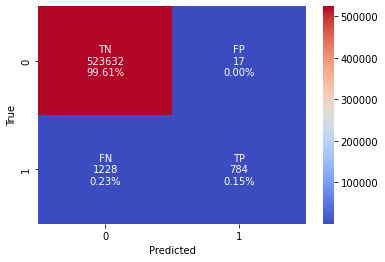

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    523649
           1       0.98      0.39      0.56      2012

    accuracy                           1.00    525661
   macro avg       0.99      0.69      0.78    525661
weighted avg       1.00      1.00      1.00    525661



In [ ]:
# 0.8로 조금 더 엄격하게 (정밀도를 높이고, 재현율 희생)
rs_proba_int2 = (rs_proba[:,1] > 0.8).astype('int') # 1이 될 확률이 0.8이 넘어야 1로 취급
confusion_matrix_view(y_test, rs_proba_int2)

# 변수 중요도

In [ ]:
model.feature_importances_

array([599, 345, 357, 440, 232, 181, 408,  34,   7,  22,  20,  15,  22,
        29,  27,  71,  20,  37,  23,  56,  55])

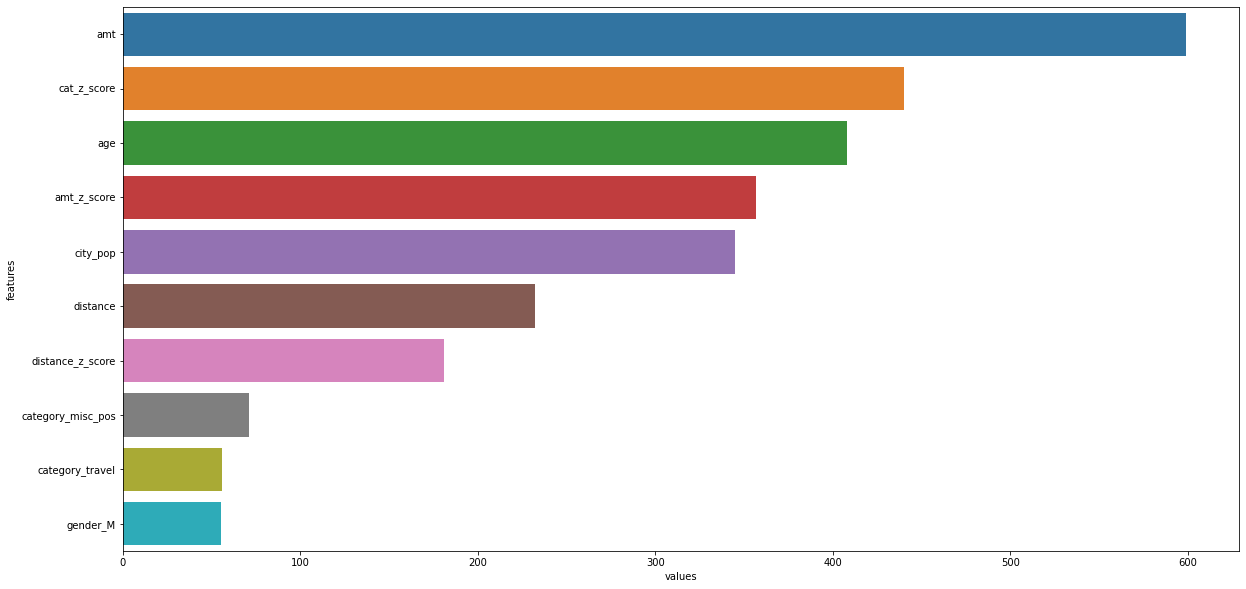

In [ ]:
feature_imp = pd.DataFrame({'features': X_train.columns, 'values': model.feature_importances_})
plt.figure(figsize=(20, 10))
sns.barplot(x='values', y='features',
            data=feature_imp.sort_values(by='values', ascending=False).head(10))
plt.show()